In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from copy import deepcopy

In [3]:
sim=[]
N = 1200

for i in range(N):
    sim.append(pd.read_csv(f'data_local/sim2/job_{i}.txt', sep="\t",encoding='iso-8859-1', on_bad_lines='skip'))
    

In [4]:
lichtAn = pd.read_csv('data_local/TheoCanLightDark_lon.txt', sep='\t')
lichtAus = pd.read_csv('data_local/TheoCanLightDark_loff.txt', sep='\t')

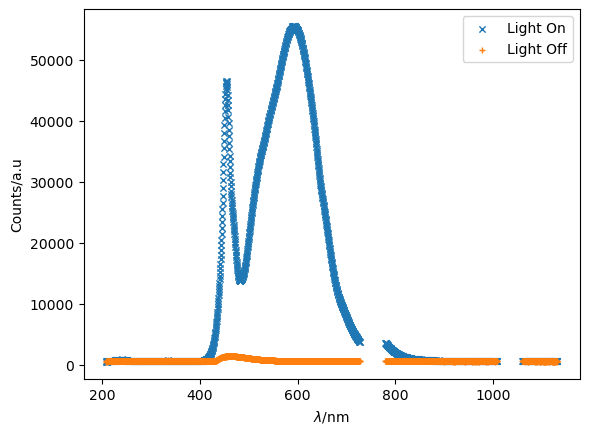

In [5]:
plt.scatter(lichtAn[lichtAn.columns[0]],lichtAn[lichtAn.columns[2]],s=20,marker='x',linewidths=1,label='Light On')
plt.scatter(lichtAus[lichtAus.columns[0]],lichtAus[lichtAus.columns[2]],s=20,marker='+',linewidths=1,label='Light Off')
plt.legend()
plt.xlabel(r'$\lambda/$nm')
plt.ylabel('Counts/a.u');

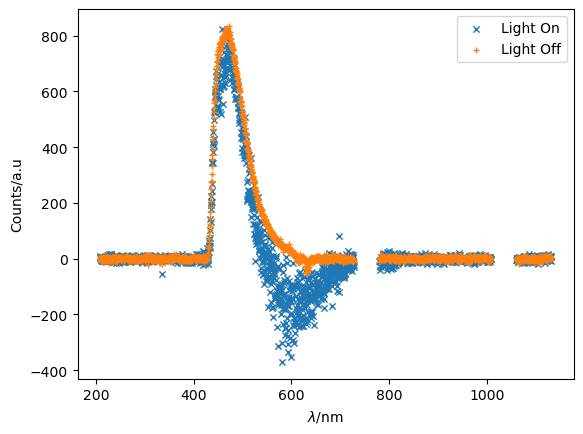

In [6]:
plt.scatter(lichtAn[lichtAn.columns[0]],lichtAn[lichtAn.columns[2]]-lichtAn[lichtAn.columns[1]],s=20,marker='x',linewidths=1,label='Light On')
plt.scatter(lichtAus[lichtAus.columns[0]],lichtAus[lichtAus.columns[2]]-lichtAus[lichtAus.columns[1]],s=20,marker='+',linewidths=1,label='Light Off')
plt.legend()
plt.xlabel(r'$\lambda/$nm')
plt.ylabel('Counts/a.u');

In [7]:
np.linspace(-6,31.8,15), np.linspace(-18,26.8,15)

(array([-6. , -3.3, -0.6,  2.1,  4.8,  7.5, 10.2, 12.9, 15.6, 18.3, 21. ,
        23.7, 26.4, 29.1, 31.8]),
 array([-18. , -14.8, -11.6,  -8.4,  -5.2,  -2. ,   1.2,   4.4,   7.6,
         10.8,  14. ,  17.2,  20.4,  23.6,  26.8]))

In [8]:
radialC = np.empty((15,15))
radialDC = np.empty((15,15))
for (i,h) in enumerate(np.linspace(-18,26.8,15)):
    for (j,v) in enumerate(np.linspace(-6,31.8,15)):
        # print(i,j,"   ",h,v.round(1))
        try:
            radC_ = pd.read_csv(f"data_local/TheoCanRadial/Attenuation_h={h:.1f}deg_v={v:.1f}deg_x=0mm.txt",sep="\t")
            radDC_ = pd.read_csv(f"data_local/TheoCanRadial/DarkCounts_h={h:.1f}deg_v={v:.1f}deg.txt",sep="\t")
        except:
            try:
                radC_ = pd.read_csv(f"data_local/TheoCanRadial/Attenuation_h={h:.0f}deg_v={v:.1f}deg_x=0mm.txt",sep="\t")
                radDC_ = pd.read_csv(f"data_local/TheoCanRadial/DarkCounts_h={h:.0f}deg_v={v:.1f}deg.txt",sep="\t")
            except:
                try:
                    radC_ = pd.read_csv(f"data_local/TheoCanRadial/Attenuation_h={h:.1f}deg_v={v:.0f}deg_x=0mm.txt",sep="\t")
                    radDC_ = pd.read_csv(f"data_local/TheoCanRadial/DarkCounts_h={h:.1f}deg_v={v:.0f}deg.txt",sep="\t")
                except:
                    radC_ = pd.read_csv(f"data_local/TheoCanRadial/Attenuation_h={h:.0f}deg_v={v:.0f}deg_x=0mm.txt",sep="\t")
                    radDC_ = pd.read_csv(f"data_local/TheoCanRadial/DarkCounts_h={h:.0f}deg_v={v:.0f}deg.txt",sep="\t")
        radialC[i,j] =  radC_[radC_.columns[-1]].sum()
        radialDC[i,j] =  radDC_[radDC_.columns[-1]].sum()

rad = (radialC - radialDC)/np.max((radialC - radialDC))

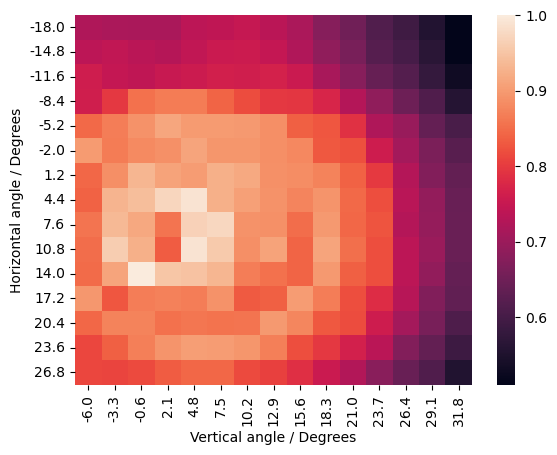

In [9]:
sns.heatmap(rad, yticklabels=np.linspace(-18,26.8,15).round(1), xticklabels=np.linspace(-6,31.8,15).round(1))
plt.xlabel('Vertical angle / Degrees')
plt.ylabel('Horizontal angle / Degrees');

In [10]:
sim[0].head()

,# y_exit,z_exit,x_start,y_start,z_start,px_start,py_start,pz_start,reflCoCl,reflClCl,wl,gpsPosX,length_core,length_clad,rayleighScatterings
0,-0.026978,-0.061619,2400.019897,-0.051878,0.096635,0.948434,0.162628,-0.272077,3649.0,0.0,472.743103,2400.0,2530.557861,0.000000,0.0
1,-0.055254,0.050902,2400.000732,0.085666,0.015889,0.977825,-0.139056,-0.156593,2674.0,0.0,504.521210,2400.0,2454.456055,0.000000,0.0
2,0.049212,0.065583,2399.990967,0.006511,-0.025208,0.917937,-0.225034,0.326729,0.0,3894.0,442.621185,2400.0,2204.132568,381.522583,0.0
3,-0.018177,-0.106197,2400.062012,-0.043234,-0.098842,0.885576,0.074564,-0.458470,0.0,5517.0,484.213989,2400.0,2210.260498,466.030212,0.0
4,0.050591,0.043467,2400.000977,-0.004035,-0.069628,0.971248,-0.103995,-0.214154,2757.0,0.0,489.916565,2400.0,2470.986084,0.000000,0.0


In [11]:
col = sim[0].columns

In [12]:
sim_ = sim[0]
for i in range(N):
    sim[i]['r_exit'] = np.sqrt(sim[i][col[0]]**2 + sim[i][col[1]]**2)
    sim_['r_exit'] = np.sqrt(sim_[col[0]]**2 + sim_[col[1]]**2)
    sim[i] = sim[i][((sim[i]['r_exit']<0.125) & (sim[i]['rayleighScatterings']==0.0))]

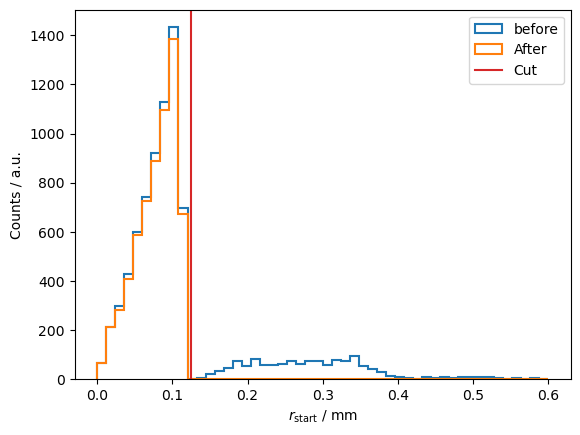

In [13]:
counts, bins, stff = plt.hist(sim_['r_exit'],histtype='step', bins=50, linewidth=1.5, label='before',range=(0, 0.6))
plt.hist(sim[0]['r_exit'],histtype='step', bins=bins, linewidth=1.5, label='After');
plt.axvline(x=0.125, label='Cut', c='tab:red')
plt.xlabel(r"$r_{\mathrm{start}}$ / mm")
plt.ylabel("Counts / a.u.")
plt.legend();

In [14]:
simKern = []
simMantel = []

for i in range(N):
    simKern.append(deepcopy(sim[i][(sim[i]['length_clad']==0.0)]))
    simMantel.append(deepcopy(sim[i][(sim[i]['length_clad']!=0.0)]))


In [15]:
for i in range(N):
    simKern[i]['thetha'] = np.arccos(simKern[i]['px_start'])
    simMantel[i]['thetha'] = np.arccos(simMantel[i]['px_start'])

In [16]:
dfK = deepcopy(simKern[0])
dfM = deepcopy(simMantel[0])

for i in range(49):
    dfK = pd.concat((dfK, simKern[i+1]))
    dfM = pd.concat((dfM, simMantel[i+1]))

In [17]:
nC = 1.60
n1 = 1.49
n2 = 1.42

theta1 = np.arccos(n1/nC)*180/np.pi
theta2 = np.arccos(n2/nC)*180/np.pi
print(theta1, theta2)

21.36948696857144 27.43924015068111


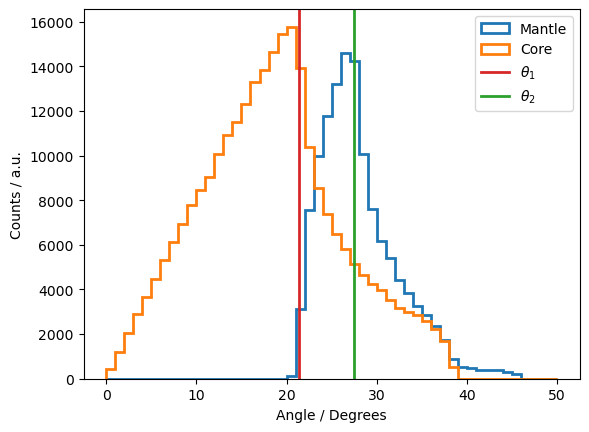

In [18]:
counts, bins, stf = plt.hist(dfM['thetha']*180/np.pi, bins=50, histtype='step', label='Mantle', linewidth=2, range=(0,50))
plt.hist(dfK['thetha']*180/np.pi, bins=bins, histtype='step', linewidth=2,label='Core');
plt.axvline(x=theta1, label=r'$\theta_1$', linewidth=2, c='tab:red')
plt.axvline(x=theta2, label=r'$\theta_2$', linewidth=2, c='tab:green')


plt.xlabel("Angle / Degrees")
plt.ylabel("Counts / a.u.")
plt.legend();

In [19]:
# def distance_lineline(v1, v2, p1, p2): # v1, v2, p1, p2 should be numpy arrays
#     cross_prod = np.cross(v1, v2)
#     if np.all(cross_prod == 0):
#         return np.linalg.norm(p1 - p2)
#     n = cross_prod / np.linalg.norm(cross_prod)
#     return np.abs(np.dot(n, (p1 - p2)))

# def r_min(px, py, pz, x, y, z):
#     a = np.array([x, y, z])
#     p = np.array([px, py, pz])
#     return distance_lineline(np.array([1, 0, 0]), p, np.zeros(3), a)

In [26]:
def r_min(x,y,z,px,py,pz):
    x = np.array([x,y,z])
    p_ = np.array([1,0,0])
    p = np.array([px,py,pz])

    print(x.size)

    if (np.linalg(np.cross(p,p_))==0):
        return 

    return np.abs(np.dot(  np.cross(p,p_)/ np.linalg(np.cross(p,p_)) , x))

In [27]:
for i in range(N):
    simKern[i]['r_min'] = r_min(simKern[i]['x_start'],simKern[i]['y_start'],simKern[i]['z_start'], simKern[i]['px_start'],simKern[i]['py_start'],simKern[i]['pz_start'])
    simMantel[i]['r_min'] = r_min(simMantel[i]['x_start'],simMantel[i]['y_start'],simMantel[i]['z_start'], simMantel[i]['px_start'],simMantel[i]['py_start'],simMantel[i]['pz_start'])

4247


ValueError: incompatible dimensions for cross product
(dimension must be 2 or 3)

In [ ]:
plt.hist2d

In [20]:
angleC = []
angleDC = []
for i in range(44):
    angleC.append(pd.read_csv(f'data_local/TheoCanAngle/Attenuation_h={i}deg_v=0deg_x=0mm.txt', sep='\t'))
    angleC.append(pd.read_csv(f'data_local/TheoCanAngle/Attenuation_h={i}.5deg_v=0deg_x=0mm.txt', sep='\t'))
    angleC.append(pd.read_csv(f'data_local/TheoCanAngle/DarkCounts_h={i}deg_v=0deg.txt', sep='\t'))
    angleC.append(pd.read_csv(f'data_local/TheoCanAngle/DarkCounts_h={i}.5deg_v=0deg.txt', sep='\t'))